# Podstawy programowania w analizie danych

## Tomasz Rodak

2017/2018, semestr letni

Wykład X

# Iteratory

## Tworzenie iteratorów za pomocą klas

Klasa tworzy iteratory, gdy posiada metody 

* `__next__(self)`
* `__iter__(self)`

przy czym `__iter__()` musi być postaci

```python
def __iter__(self):
    return self
```

## Klasa `PostępArytmetyczny`

Utworzymy klasę `PostępArytmetyczny`. Klasa zwraca iterator z postępem arytmetycznym o zadanym wyrazie początkowym, różnicy i liczbie wyrazów.

**Testy**

In [87]:
postęp = PostępArytmetyczny(a=2, r=4, n=3)

assert [next(postęp), next(postęp), next(postęp)] == [2, 6, 10]

try:
    next(postęp)
except StopIteration:
    pass
else:
    raise AssertionError('PostępArytmetyczny został wyczerpany.')

a, r, n = 123, -13, 100
postęp = PostępArytmetyczny(a, r, n)

assert list(postęp) == list(range(a, a + n*r, r))

In [88]:
class PostępArytmetyczny:
    
    def __init__(self, a, r, n):
        self.a, self.r, self.n = a, r, n
        self._indeks, self._wyraz = 0, a
       
    def __next__(self):
        if self._indeks < self.n:
            wyraz = self._wyraz
            self._indeks += 1
            self._wyraz += self.r
            return wyraz
        else:
            raise StopIteration
        
    def __iter__(self):
        return self

Przerzucenie postępu do listy.

In [89]:
postęp = PostępArytmetyczny(2, 3, 10)
list(postęp)

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]

Iteracja po postępie pętlą `for-in`

In [90]:
postęp = PostępArytmetyczny(2, 3, 10)

for x in postęp:
    print(x, end=', ')

2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 

Wysumowanie wyrazów.

In [91]:
postęp = PostępArytmetyczny(2, 3, 10)
sum(postęp)

155

## Iteratory nieskończone

Iteratory zwracają elementy jedynie na żądanie, mogą więc reprezentować obiekty faktycznie nieskończone.

Napiszmy klasę `Kwadraty` zwracającą iterator zawierający wszystkie liczby naturalne będące kwadratami, czyli `0, 1, 4, 9, 16, ...`.

**Testy**

In [92]:
kw = Kwadraty()

assert next(kw) == 0
assert next(kw) == 1
assert next(kw) == 4

assert [next(kw) for _ in [1, 2, 3]] == [9, 16, 25]

In [93]:
class Kwadraty:
    
    def __init__(self):
        self.licznik = -1
        
    def __next__(self):
        self.licznik += 1
        return self.licznik ** 2
    
    def __iter__(self):
        return self

## Podsumowanie

### Iterator

* **Iterator** to obiekt implementujący metody `__next__(self)` oraz `__iter__(self)`.
* Metoda `__next__()` zwraca kolejny element lub wywołuje wyjątek `StopIteration`, gdy nie ma już więcej elementów.
* Metoda `__iter__()` powinna mieć postać:
  ```python
  def __iter__(self):
      return self
  ```
* Dzięki implementacji `__iter__()` iterator jest obiektem iterowalnym.
* Iterator jest **leniwy**: produkuje wartości na żądanie.
* Iterator można przebiec **tylko raz**. Po wyczerpaniu jest bezużyteczny.

### Obiekt iterowalny

* **Obiekt iterowalny** to dowolny obiekt, z którego funkcja `iter()` może uzyskać iterator. 
* Obiektami iterowalnymi są:
  * obiekty implementujące metodę `__iter__()`,
  * obiekty implementujące metodę `__getitem__()` przyjmującą indeksy zaczynające się od zera.
  * w szczególności iterowalne są: sekwencje, słowniki, zbiory, strumienie plików i praktycznie wszystkie kontenery z biblioteki standardowej.
* Obiekt iterowalny zawsze może wystąpić w pętli `for`:
  ```python
  for element in obiekt_iterowalny:
      ...
  ```

# Generatory

## Funkcja generatora

* **Funkcja generatora** to funkcja, która zawiera w swoim ciele słowo zarezerwowane **`yield`**.
* **Generator** to obiekt zwracany przez funkcję generatora.
* Każdy generator jest iteratorem.

## Przykład

Chcemy mieć iterator składający się z liter a, b, c.

Utworzymy go dwoma sposobami: pisząc klasę i funkcję generatora.

### Klasa

In [94]:
class TrzyLitery:
    
    def __init__(self):
        self.i = 0
        self.litery = 'abc'
    
    def __next__(self):
        try:
            litera = self.litery[self.i]
        except IndexError:
            raise StopIteration
        
        self.i += 1
        return litera
    
    def __iter__(self):
        return self

In [95]:
lt = TrzyLitery()

lt

In [96]:
list(lt)

['a', 'b', 'c']

### Funkcja generatora

In [97]:
def trzy_litery():
    yield 'a'
    yield 'b'
    yield 'c'

In [98]:
lt = trzy_litery()

lt

<generator object trzy_litery at 0x7f3bd41133b8>

In [99]:
list(lt)

['a', 'b', 'c']

Jeszcze prościej.

In [100]:
def trzy_litery():
    for litera in 'abc':
        yield litera

In [101]:
lt = trzy_litery()

lt

<generator object trzy_litery at 0x7f3bd4113888>

In [102]:
list(lt)

['a', 'b', 'c']

## `yield`

* Instrukcja `yield` działa inaczej niż `return` -- zwraca wartość i wstrzymuje działanie funkcji, ale jej nie opuszcza.

* Funkcja generatora po wywołaniu natychmiast zwraca generator, nie oblicza jednak jego wartości.

* Wartości generatora są obliczane przez funkcję generatora dopiero na żądanie.

### Przykład

Jaka jest różnica między funkcjami `f()` i `g()`?

In [103]:
def f():
    for litera in 'abc':
        return litera

In [104]:
def g():
    for litera in 'abc':
        yield litera

* `f()` zwraca łańcuch `'a'`.
* `g()` zwraca generator.
* `f()` próbuje od razu biec po całej pętli, zdąży jednak wykonać tylko jeden obrót.
* `g()` wykonuje całą pętlę stopniowo, w odpowiedzi na kolejne żądania `__next__()`.

## Postęp arytmetyczny

Piszemy funkcję generatora zwracającą postępy arytmetyczne, dokładnie takie same jak klasa `PostępArytmetyczny`.

Użyjemy tych samych testów.

In [105]:
postęp = postęp_arytmetyczny(a=2, r=4, n=3)

assert [next(postęp), next(postęp), next(postęp)] == [2, 6, 10]

try:
    next(postęp)
except StopIteration:
    pass
else:
    raise AssertionError('PostępArytmetyczny został wyczerpany.')

a, r, n = 123, -13, 100
postęp = postęp_arytmetyczny(a, r, n)

assert list(postęp) == list(range(a, a + n*r, r))

`yield` nie opuszcza funkcji, możemy więc wykonać `yield` przy każdym obrocie pętli.

In [106]:
def postęp_arytmetyczny(a, r, n):
    for _ in range(n):
        yield a
        a += r

## Rzuty kostką

Piszemy funkcję generatora zwracającą generator rzutów kostką aż do wystąpienia żądanej liczby oczek.

In [107]:
from random import randint

def rzuty_aż_wystąpi(k):
    while True:
        rzut = randint(1, 6)
        yield rzut
        
        if rzut == k:
            break

In [108]:
list(rzuty_aż_wystąpi(6))

[6]

Wersja, w której ostatniego rzutu nie ma w wynikach.

In [109]:
from random import randint

def rzuty_aż_wystąpi(k):
    while True:
        rzut = randint(1, 6)
        
        if rzut == k:
            break
        
        yield rzut

In [110]:
list(rzuty_aż_wystąpi(6))

[5, 1, 1, 3]

## Ciąg Fibonacciego

Funkcja generatora zwracająca generatory nieskończone z ciągiem Fibonacciego.

In [111]:
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

Jak uzyskać 15 pierwszych wyrazów?

In [112]:
fibonacci = fib()

[next(fibonacci) for _ in range(15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

Jak uzyskać 15-ty wyraz?

In [113]:
fibonacci = fib()

for _ in range(14):
    next(fibonacci)

next(fibonacci)

377

Jak uzyskać wyrazy mniejsze niż 10000?

In [114]:
fibonacci = fib()

for f in fibonacci:
    if f >= 10000:
        break
    
    print(f, end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 

## Wyrażenie generatora

* Generatory są też zwracane przez **wyrażenie generatora**.

* Składnia dla wyrażenia generatora jest taka jak dla wyrażenia listowego, tyle że zewnętrzne nawiasy `[]` zastępujemy przez `()`.

In [115]:
potęgi_dwójki = (2 ** n for n in range(10))

potęgi_dwójki

<generator object <genexpr> at 0x7f3bd4113830>

In [116]:
list(potęgi_dwójki)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

Niektóre funkcje, jak np. `sum()` pozwalają na opuszczenie nawiasów otaczających wyrażenie generatora.

In [117]:
sum(2 ** n for n in range(10)), 2**10 - 1

(1023, 1023)

## Terminologia

* Społeczność Pythona często traktuje terminy *iterator* i *generator* jak synonimy.

* Terminologię dla tego wykładu zaczerpnąłem z książki L. Ramahlo, *Zaawansowany Python*.

* [Python Glossary](https://docs.python.org/3/glossary.html#term-generator) *generatorem* nazywa funkcję zawierającą `yield`. Obiekt zwracany przez tę funkcję nazywany jest *iteratorem generatorem*.

## Zadanie

Napisz funkcję generatora `krata()`. Funkcja zwraca nieskończony generator przechodzący przez wszystkie całkowitoliczbowe punkty płaszczyzny. Trasa nie może się przecinać -- generator przechodzi przez każdy punkt dokładnie jeden raz.

In [118]:
def ciąg_z_liczbami_kroków():
    k = 1
    
    while True:
        yield k
        yield k
        k += 1

In [119]:
KIERUNKI = 'PDLG'

def ciąg_z_kierunkami():
    while True:
        for kierunek in KIERUNKI:
            yield kierunek

In [120]:
FUNKCJE = dict(P=lambda x, y: (x + 1, y),
               D=lambda x, y: (x, y - 1),
               L=lambda x, y: (x - 1, y),
               G=lambda x, y: (x, y + 1))
            
def krata():
    kroki = ciąg_z_liczbami_kroków()
    kierunki = ciąg_z_kierunkami()
    x, y = 0, 0
    
    while True:
        liczba_kroków = next(kroki)
        kierunek = next(kierunki)
        for _ in range(liczba_kroków):
            yield x, y
            x, y = FUNKCJE[kierunek](x, y)
        

In [121]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')

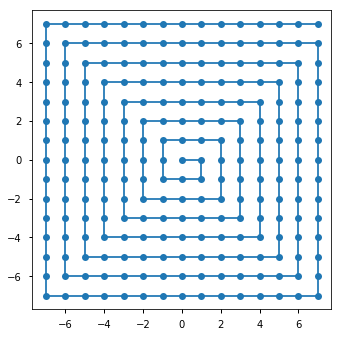

In [122]:
N = 15**2
p = krata()
punkty = [next(p) for _ in range(N)]
X, Y = zip(*punkty)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(X, Y, marker='o');

## Do poczytania

[A. Kuchling, *Functional Programming HOWTO*](https://docs.python.org/3/howto/functional.html)